# Part I: Preprocessing and EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

## Problem 1: Dataset Import & Cleaning

In [6]:
orders = pd.read_csv('./data/Orders.csv')

In [122]:
orders.sample(5)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
6440,16199,ES-2014-BF1108048-41964,2014-11-21,2014-11-28,Standard Class,BF-1108048,Bart Folk,Consumer,NaN,Koblenz,Rhineland-Palatinate,Germany,Western Europe,Europe,TEC-CO-4592,Technology,Copiers,"Hewlett Wireless Fax, High-Speed",756.78,2,0.0,370.80,52.860,Medium
14040,48101,TZ-2012-RW9690129-41062,2012-06-02,2012-06-08,Standard Class,RW-9690129,Robert Waldorf,Consumer,NaN,Dar es Salaam,Dar Es Salaam,Tanzania,Eastern Africa,Africa,TEC-MA-5015,Technology,Machines,"Konica Printer, Red",238.49,1,0.1,92.72,21.620,Medium
31929,31394,CA-2015-KD16345140-42173,2015-06-18,2015-06-21,First Class,KD-163451404,Katherine Ducich,Consumer,94122.0,San Francisco,California,United States,Western US,USCA,OFF-BI-6317,Office Supplies,Binders,Trimflex Flexible Post Binders,51.31,3,0.2,17.96,9.520,High
38662,428,MX-2014-BP1118582-41795,2014-06-05,2014-06-11,Standard Class,BP-1118582,Ben Peterman,Corporate,NaN,Madero,Tamaulipas,Mexico,Central America,LATAM,OFF-ST-4253,Office Supplies,Storage,"Fellowes Box, Wire Frame",62.50,5,0.0,26.80,2.565,Medium
16997,6043,US-2013-FO1430598-41562,2013-10-15,2013-10-22,Standard Class,FO-1430598,Frank Olsen,Consumer,NaN,San Miguelito,Panama,Panama,Central America,LATAM,FUR-BO-3631,Furniture,Bookcases,"Bush Corner Shelving, Traditional",247.98,5,0.4,-66.22,16.346,Medium


In [8]:
orders.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales              object
Quantity            int64
Discount          float64
Profit             object
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [9]:
orders.shape

(51290, 24)

In [11]:
orders.describe()

,Row.ID,Postal.Code,Quantity,Discount,Shipping.Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,3.476545,0.142908,26.478567
std,14806.29199,32063.693350,2.278766,0.212280,57.251373
min,1.00000,1040.000000,1.000000,0.000000,1.002000
25%,12823.25000,23223.000000,2.000000,0.000000,2.610000
50%,25645.50000,56430.500000,3.000000,0.000000,7.790000
75%,38467.75000,90008.000000,5.000000,0.200000,24.450000
max,51290.00000,99301.000000,14.000000,0.850000,933.570000


Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type.

In [29]:
orders['Sales'] = orders.Sales.apply(lambda x: x.replace('$', ''))

In [37]:
orders['Sales'] = orders.Sales.apply(lambda x: x.replace(',', ''))

In [38]:
orders['Sales'] = orders['Sales'].astype(float)

In [40]:
orders['Profit'] = orders.Profit.apply(lambda x: x.replace('$', ''))

In [41]:
orders['Profit'] = orders.Profit.apply(lambda x: x.replace(',', ''))

In [42]:
orders['Profit'] = orders.Profit.astype(float)

In [45]:
orders.Sales.head()

0     221.98
1    3709.40
2    5175.17
3    2892.51
4    2832.96
Name: Sales, dtype: float64

In [46]:
orders.Profit.head()

0     62.15
1   -288.77
2    919.97
3    -96.54
4    311.52
Name: Profit, dtype: float64

## Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

In [48]:
orders.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode', 'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City', 'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category', 'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping.Cost', 'Order.Priority'], dtype='object')

In [60]:
orders['Order.Date'].head()

0    11/11/14
1      2/5/14
2    10/17/14
3     1/28/14
4     11/5/14
Name: Order.Date, dtype: object

In [61]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'], format = '%m/%d/%y')

In [62]:
orders['Ship.Date'] = pd.to_datetime(orders['Ship.Date'], format = '%m/%d/%y')

In [123]:
orders['Order.Month'] = orders['Order.Date'].dt.month

In [124]:
orders['Order.Year'] = orders['Order.Date'].dt.year

In [126]:
orders['Order.Day'] = orders['Order.Date'].dt.day

In [69]:
check_seasonal = orders.groupby('Order.Date').sum()

In [72]:
check_seasonal.head()

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost
Order.Date,,,,,,,
2012-01-01,169809,0.0,808.57,19,0.800,198.87,64.670
2012-01-02,49550,0.0,314.22,1,0.000,3.12,24.100
2012-01-03,645924,0.0,4503.54,48,3.720,184.60,473.421
2012-01-04,266736,77095.0,2808.87,52,1.802,635.12,227.947
2012-01-05,166620,181620.0,3662.31,24,1.200,1053.37,250.061


In [105]:
month_year = pd.DataFrame()
month_year['month'] = pd.DatetimeIndex(orders['Order.Date']).month.astype('int')
month_year['year'] = pd.DatetimeIndex(orders['Order.Date']).year.astype('int')
month_year['quantity'] = orders.Quantity.values
month_year.groupby(by=['year', 'month']).sum()

quantity
year month          
2012 1          1463
     2          1401
     3          1745
     4          1934
     5          2167
     6          3002
     7          1836
     8          3020
     9          3644
     10         2981
     11         3924
     12         4326
2013 1          1874
     2          1444
     3          2237
     4          2250
     5          2921
     6          3671
     7          2321
     8          3818
     9          4205
     10         3563
     11         5193
     12         4614
2014 1          2413
     2          2102
     3          2686
     4          2688
     5          3808
     6          5327
     7          3252
     8          4934
     9          5793
     10         3883
     11         5556
     12         5694
2015 1          3122
     2          2482
     3          3722
     4          3594
     5          4300
     6          6009
     7          3637
     8          5824
     9          6837
     10         5876
     11         7706
     12         7513

In [95]:
MY = month_year.groupby(by=['year', 'month']).sum()

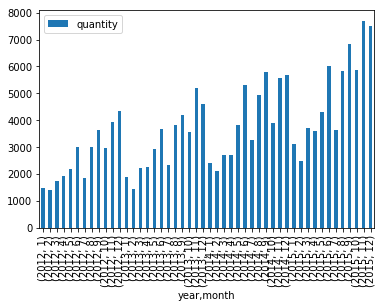

In [97]:
MY.plot.bar()

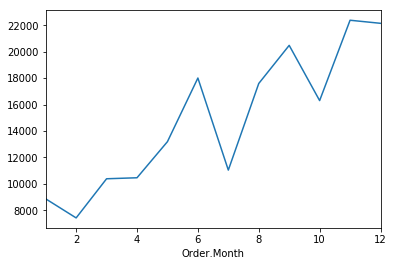

In [129]:
orders.groupby('Order.Month')['Quantity'].sum().plot()

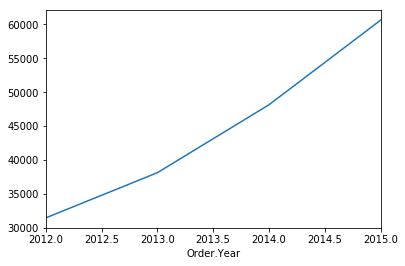

In [130]:
orders.groupby('Order.Year')['Quantity'].sum().plot()

In [118]:
seasonal_categories = pd.DataFrame()
seasonal_categories['month'] = pd.DatetimeIndex(orders['Order.Date']).month.astype('int')
seasonal_categories['year'] = pd.DatetimeIndex(orders['Order.Date']).year.astype('int')
seasonal_categories['quantity'] = orders.Quantity.values
seasonal_categories['category'] = orders.Category.values
SC = seasonal_categories.groupby(by=['category', 'year', 'month']).sum()

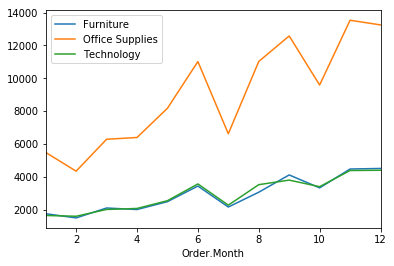

In [131]:
for index, group in orders.groupby(['Category']):
    group_agg = group.groupby(['Order.Month'])['Quantity'].sum()
    group_agg.plot(y = 'Quantity', label = index, legend = True)

In [ ]:
seasonList = [1,1,2,2,2,3,3,3,4,4,4,1]
seasonDict = dict(zip(range(1,13), seasonList))
nameDict = 

## Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?


	2. How many customer returned more than once? more than 5 times?


	3. Which regions are more likely to return orders?


	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.


In [132]:
returns = pd.read_csv('./data/Returns.csv')

In [133]:
returns.shape

(1079, 3)

In [135]:
returns.sample(5)

,Returned,Order ID,Region
253,Yes,IT-2012-GD1459091-40988,Western Europe
141,Yes,IN-2012-TB2162588-41177,Southeastern Asia
548,Yes,ES-2015-DK13375139-42082,Northern Europe
434,Yes,MX-2012-KM1672018-41242,South America
508,Yes,NI-2013-JB600095-41621,Western Africa


In [138]:
#'Region' is in both data sets
returns = returns.drop('Region', axis=1).merge(orders, how='left', left_on='Order ID', right_on ='Order.ID')

In [139]:
returns.shape

(2220, 29)

In [141]:
returns.dtypes

Returned                  object
Order ID                  object
Row.ID                     int64
Order.ID                  object
Order.Date        datetime64[ns]
Ship.Date         datetime64[ns]
Ship.Mode                 object
Customer.ID               object
Customer.Name             object
Segment                   object
Postal.Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product.ID                object
Category                  object
Sub.Category              object
Product.Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping.Cost            float64
Order.Priority            object
Order.Month                int64
Order.Year                 int64
Order.Day                  int64
dtype: object

How much profit did we lose due to returns each year?

In [144]:
returns.groupby('Order.Year')['Profit'].apply(lambda c: c.abs().sum())

Order.Year
2012    29022.34
2013    24695.95
2014    32389.49
2015    48928.17
Name: Profit, dtype: float64

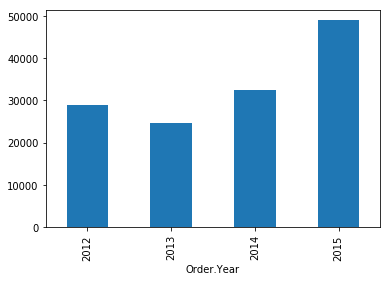

In [145]:
returns.groupby('Order.Year')['Profit'].apply(lambda c: c.abs().sum()).plot.bar()

2. How many customer returned more than once? more than 5 times?

In [143]:
len(returns.groupby('Customer.ID').filter(lambda x: len(x) > 1)['Customer.ID'].unique())

547

In [146]:
len(returns.groupby('Customer.ID').filter(lambda x: len(x) > 5)['Customer.ID'].unique())

46

In [147]:
custcount = returns['Customer.ID'].value_counts()

In [149]:
custcount[custcount>5]

PO-1885082      13
JK-1609027      11
MY-1829582      10
TB-2140066      10
KH-165101404     9
SG-200801404     9
JP-1552045       8
AJ-1096031       8
SN-1056095       8
HD-1478598       8
SS-2059059       8
PB-19210127      8
JE-1561097       7
SC-202301404     7
AT-1073545       7
BT-1139564       7
GK-14620101      7
DH-130751404     7
CS-1845134       7
GT-147101404     7
BM-1114055       7
BP-110951404     7
DL-12925101      7
EH-137651404     7
TC-2114555       7
ES-1408018       7
KH-1669045       6
MG-17890139      6
DB-13555139      6
JP-155205        6
AG-675117        6
BF-111701404     6
LC-168701408     6
DG-1330093       6
SC-2080059       6
MR-1754564       6
AM-10705120      6
AB-1016545       6
NC-185351404     6
Dp-1324082       6
PO-1885048       6
DW-1358531       6
NS-185051402     6
AB-60086         6
BB-1154548       6
LS-1697518       6
Name: Customer.ID, dtype: int64

3. Which regions are more likely to return orders?

In [153]:
returns.groupby('Region').size()

Region
Canada                15
Caribbean             69
Central Africa        17
Central America      248
Central Asia           9
Central US            74
Eastern Africa        18
Eastern Asia         131
Eastern Europe        42
Eastern US           134
North Africa          51
Northern Europe       76
Oceania              154
South America        133
Southeastern Asia    140
Southern Africa       25
Southern Asia        111
Southern Europe      112
Southern US           83
Western Africa        60
Western Asia         108
Western Europe       233
Western US           177
dtype: int64

4. Which categories (sub-categories) of products are more likely to be returned?

In [151]:
returns.groupby('Category').size()

Category
Furniture           427
Office Supplies    1348
Technology          445
dtype: int64

In [155]:
returns.groupby('Sub.Category').size()

Sub.Category
Accessories    138
Appliances      59
Art            217
Binders        269
Bookcases      104
Chairs         147
Copiers         99
Envelopes       99
Fasteners      102
Furnishings    135
Labels         137
Machines        63
Paper          150
Phones         145
Storage        212
Supplies       103
Tables          41
dtype: int64